### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from itertools import combinations

### Reading data

In [2]:
data_path = "../data/lab_5/admit.xlsx"

In [3]:
df = pd.read_excel(data_path)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### Data types:
##### Nominal:
Serial No.
##### Binary:
Research
##### Ordinal:
University Rating
##### Discrete:
GRE Score, TOEFL Score, SOP, LOR
##### Сontinuous:
CGPA, Chance of Admit

### Graphs

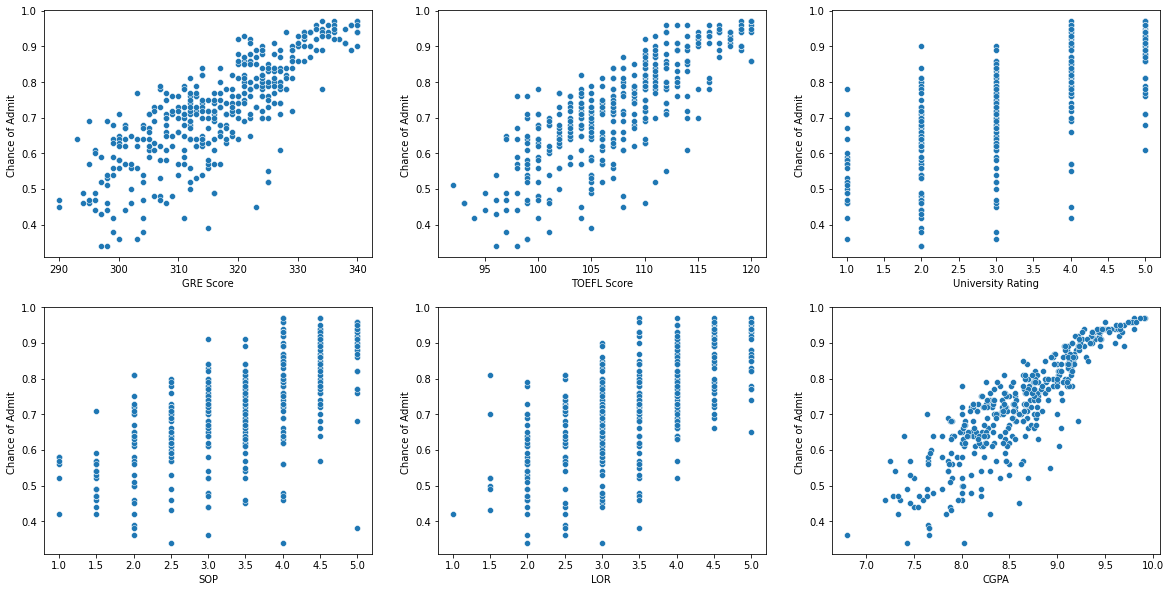

In [5]:
colnames = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"] 
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20,10)

for i in range(6):
    sns.scatterplot(data=df, y="Chance of Admit ", x=colnames[i], ax=np.ravel(axs)[i])

##### Шанс поступить на программу прямо пропорционально зависит от результатов GRE, TOEFL и CGPA. От остальных величин зависимость такая же, но менее выраженная

In [10]:
random_state = 12345
powers = [0, 1, 2]

ans = []

for num_feats in range(1, 7):
    for combination in combinations(colnames, i):
        for pow in range(1, 3):
            X = df[list(combination)].to_numpy()
            if pow != 1:
                X = np.hstack((X, np.power(X, pow)))
            X_train, X_test, y_train, y_test = train_test_split(X, df["Chance of Admit "],
                                                   test_size=0.2, random_state=random_state)
            model = LinearRegression(n_jobs=-1)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            ans.append({"feats": combination,
                "pow": pow,
                "r2_score": r2_score(y_test, y_pred), 
                "mse_score": mean_squared_error(y_test, y_pred),
                "rss_score": mean_squared_error(y_test, y_pred) * y_pred.shape[0]})

##### Best by R2

In [11]:
for res in sorted(ans, key=lambda x: -x["r2_score"])[:1]:
    print(f"Feats: {res['feats']}\nPow: {res['pow']}\nR2 score: {res['r2_score']}\n")

Feats: ('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA')
Pow: 1
R2 score: 0.7198323290778955



##### Best by MSE

In [12]:
for res in sorted(ans, key=lambda x: x["mse_score"])[:1]:
    print(f"Feats: {res['feats']}\nPow: {res['pow']}\nMSE score: {res['mse_score']}\n")

Feats: ('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA')
Pow: 1
MSE score: 0.00462398792615515



##### Best by RSS

In [9]:
for res in sorted(ans, key=lambda x: x["rss_score"])[:1]:
    print(f"Feats: {res['feats']}\nPow: {res['pow']}\nRSS score: {res['rss_score']}\n")

Feats: ('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA')
Pow: 1
RSS score: 0.369919034092412



Линейная (по признакам) модель, использующая все признаки кроме LOR является самой сильной по всем выбранным метрикам. Скорее всего, LOR исключился во время регуляризации из-за большой корреляции с SOP (судя по графику)